# OVERVIEW OF DATA
The following text was obtained from the Kaggle website. It explains the data recorded in the csv file:

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [4]:
#import the libraries needed for the project

import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1 - Initial data exploration
The aim here is to have a sense of the overall passenger information: Number of males and females, the age distribution of the passengers, the fare distribution of the passengers, the number of passengers from each class (firs, second, third) and the number of passengers that embarked in each port.

In [5]:
# open csv file and read it as a dataframe
titanic = pd.read_csv('titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


CALCULATE OVERALL NUMBER OF SURVIVALS AND PERCENTAGE OF SURVIVORS

In [9]:
titanic = pd.read_csv('titanic_data.csv')
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.head()
# Counts
print('Counts:','\n', titanic.Survival.value_counts())
# Rates
print('Rates:','\n',titanic.Survival.value_counts(normalize = True))

Counts: 
 Died        549
Survived    342
Name: Survival, dtype: int64
Rates: 
 Died        0.616162
Survived    0.383838
Name: Survival, dtype: float64


NUMBER OF MALES AND NUMBER OF FEMALES:

In [14]:
# Count the number of females and males
print 'Number of passengers from each sex:', '\n', titanic.Sex.value_counts()
print 'Proportion of passengers from each sex:', '\n', titanic.Sex.value_counts(normalize=True)

Number of passengers from each sex: 
male      577
female    314
Name: Sex, dtype: int64
Proportion of passengers from each sex: 
male      0.647587
female    0.352413
Name: Sex, dtype: float64


CALCULATE THE AGE DISTRIBUTION OF THE TITANIC PASSENGERS:

In [5]:
age = titanic['Age']
age.describe()

C:\Users\dlxtomas\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

Because the statistical results of the age data are affected by the NaN values, these values have to be removed.

In [6]:
age_noNaN = age.dropna()
age_noNaN.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In addition to the descriptive statistics regarding the age of the passengers, a histogram plot was produced to illustrate the distribution.

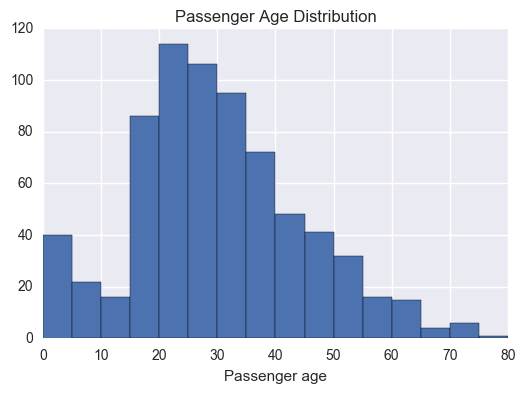

In [7]:
%matplotlib inline
#create a list of bins, starting from 0 and up to 80, with intervals of 5
bins_age = [x*5 for x in range(17)]
histogram_age=plt.hist(age_noNaN, bins_age)
plt.xlabel('Passenger age')
plt.title('Passenger Age Distribution')

It can be seen from the histogram plot that the distribution ressembles a positively skewed normal distribution curve. In addition to that, from the plot it can be seen that the mode is in the range [20, 25] years.

CALCULATE THE NUMBER OF PASSENGERS IN EACH CLASS
<p>A bar plot was produced to compare the number of passengers in each class.

Axes(0.125,0.125;0.775x0.775)
Number of passengers in each class: Third Class     491
First Class     216
Second Class    184
Name: Class, dtype: int64


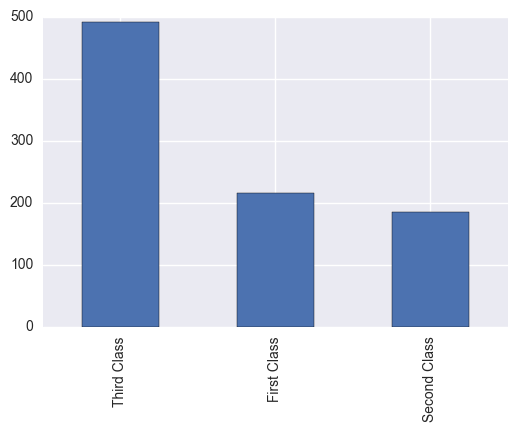

In [8]:
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
print titanic['Class'].value_counts().plot(kind='bar')
print 'Number of passengers in each class:', titanic['Class'].value_counts()

As it can be seen from the bar plot, most passengers were from a lower class. This was expected. However, it was surprising to find that there were more passengers from upper class than from middle class.

CALCULATE THE FARE DISTRIBUTION

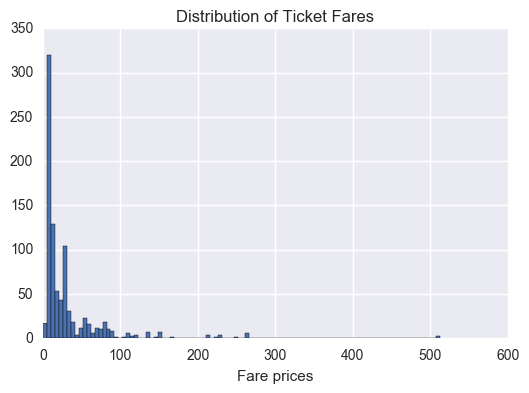

In [9]:
titanic['Fare'].describe()
## The number of bins was chosen to be 100 because the fare values are very spread.
plt.hist(titanic['Fare'], bins=100)
plt.xlabel('Fare prices')
plt.title('Distribution of Ticket Fares')

From the above histogram plot, it can be seen that the distribution of fares is positively skewed. Furthermore, it shows that there were a large number of low ticket fares. This data coincides with the ticket class data obtained before. Since most passengers were from lower class, it is also natural that most passengers paid a low fare. In addition to that, this histogram also illustrates the large difference in fares among upper class passengers, as compared to the difference in price of tickets of lower class passengers. The skewness of the graph is evidence of this. Finally, there were some passengers that obatined a free ticket, fare = 0. These were assumed to be crew members.

CALCULATE NUMBER OF CREW MEMBERS

In [10]:
#Number of crew members
titanic['crew'] = titanic.Fare.map({0:'Crew'})
print 'Number of crew:', titanic['crew'].value_counts()
print 'List of crew members:','\n', titanic.loc[titanic['crew'].dropna().index]

Number of crew: Crew    15
Name: crew, dtype: int64
List of crew members: 
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hasting

As we can see from the printed list of the 15 crew members (out of 891 passengers), all of them are male. This further confirms the suspicions that the passengers with a 0 fare were crew members, since in 1911 few women worked. From the 15 crew members only one survived. It is also interseting that among crew members there were different classes indicating that there was perhaps a hierarchy among the crew (captain, offficers ...)

CALCULATE NUMBER OF PASSENGERS FROM EACH PORT. IDENTIFY WHETHER THERE IS A CORRELATION BETWEEN EMBARKING PORT AND CLASS

Number of passengers from each port: 
Southampton    644
Cherbourg      168
Queenstown      77
Name: Ports, dtype: int64
Passenger missing embarking record: 2


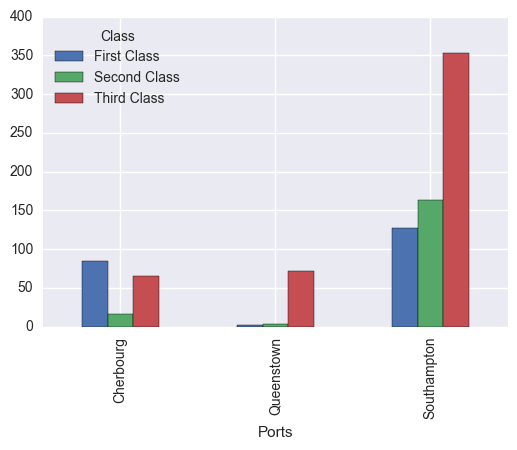

In [11]:
titanic['Ports'] = titanic.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic.groupby('Ports')['Class'].value_counts().unstack().plot(kind = 'bar')
print 'Number of passengers from each port:', '\n', titanic['Ports'].value_counts()
print 'Passenger missing embarking record:', 891 - titanic['Ports'].value_counts().sum()

Most passengers embarked in Southampton. 2 passengers did not have an embarking record.

As it can be seen from the the bar plots for each embarking point, most passengers embarked in Southampton. The number of passengers from each class(SES), which embarked in Southampton, is similar to the overall number of titanic passengers from each class(shown in one of the previous bar plots), with the exception that slightly more middle class passengers embarked in comparison to the number of upper class passengers embarking in Southampton. In Queenstown, however, mostly lower class passengers embarked. Finally, Cherbourg showed the largest proportion of upper class passeners which embarked there. The purpose of producing these bar plot was to obtain insight into the average SES of the citizens from these three cities, by using the titanic data as a sample. 

# 2 - How was survival affected by age and gender?

In [15]:
survival_sex = titanic[['Sex', 'Survived']]
##Because the Survived column can only be 1 or 0, a groupby object was created and the sum of Survived values for each sex
## was calculated, which is the same as the number of survivors.
survivors_sex = survival_sex.groupby('Sex').sum()
survivors_female_rate = float(survivors_sex['Survived']['female'])/titanic.Sex.value_counts()['female']
survivors_male_rate = float(survivors_sex['Survived']['male'])/titanic.Sex.value_counts()['male']
## The proportions where calculated by dividing the number of surviving passengers from one sex by the 
## total number of passengers of that sex.
print 'Male survival proportion:', survivors_male_rate
print 'Female survival proportion:', survivors_female_rate

Male survival proportion: 0.188908145581
Female survival proportion: 0.742038216561


The percentage of surviving female passengers was found to be 74% and the percentage of surviving male passengers was much lower with a value of 19%.

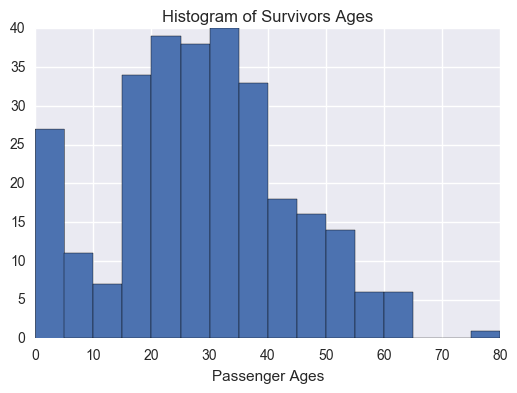

In [16]:
survival_age = titanic[['Age', 'Survived']]
survivors_age = survival_age[survival_age['Survived']==1]
## Have to use dropna to remova NaN values. Bins for the following histogram have to be the same as the bins for the previous
## age distribution histogram in order to be able to compare the data. That is why the same variable, bins_age, is used.
histogram_survivors_age = plt.hist(survivors_age['Age'].dropna(), bins_age)
## To calculate the survival proportion for each age group displayed in the previous histogram, the first array of the plt.hist
## output used. Then a division was done between the array containing the data of the age of survivors and the array of 
# the data containing the age of all passengers(survivors and non survivors. This histogram was in the initial data exploration).
survival_rate_age = histogram_survivors_age[0]/histogram_age[0]
plt.title('Histogram of Survivors Ages')
plt.xlabel('Passenger Ages')

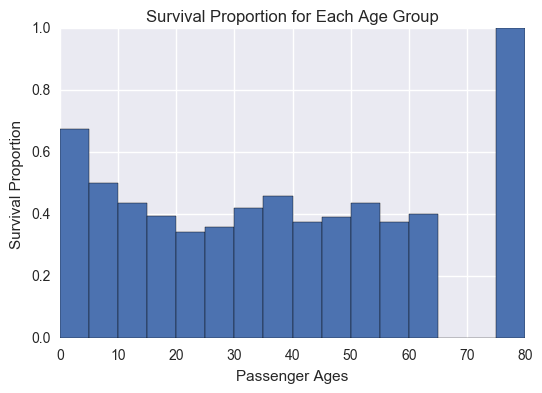

In [17]:
## A bar plot was produced to compare the survival proportion for each age group.
## bins-age[:16] had to be used to match the number of elements in the survival_rate_age array to the elements in the list bins_age
## Because the bar_width was equalled to 5, the last number of the list, 80, was removed, as that values would be included
## in the bin 75 to 80.
plt.bar(bins_age[:16], survival_rate_age, width=5, align='edge')
plt.xlabel('Passenger Ages')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportion for Each Age Group')

In [18]:
## I was curious about 100% survival rate for passengers older than 75. So I decided to check them out in order to see if there
## was something wrong about the data.
titanic[titanic['Age']>75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,crew,Ports
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,Survived,First Class,NaN,Southampton


The reason why there is a 100% survival rate for passengers older than 75 and younger than 80 is because there was only one passenger with such an age, and he happened to survive. Therefore, the 100% survival rate for the last bar in the survival proportion vs age bar plot should be ignored.

Therefore, if the last bar is ignored, it can be appreciated that children younger than 10 had a higher survival proportion than other passengers. For the other age groups the survival proportion is fairly similar. The minimum survival proportion occurs for passengers older than 20 and younger than 25. This might be because most passengers in those ages were from a lower class. The next bit of code will investigate this conjecture.

Axes(0.125,0.125;0.775x0.775)


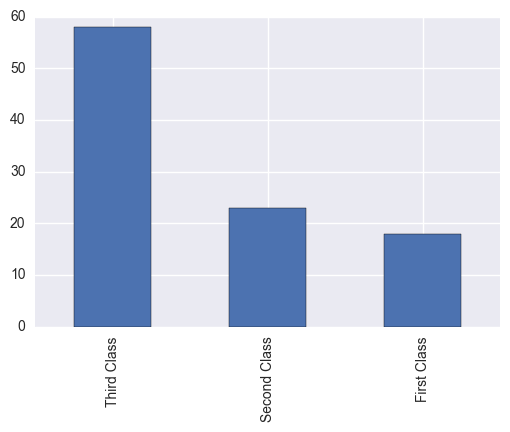

In [19]:
older_20 = titanic[titanic['Age']>20]
older_20_younger_25 = older_20[older_20['Age']<25]
print older_20_younger_25.Class.value_counts().plot(kind='bar')

If this bar plot is compared to the bar plot showing the total number of passengers in each class, it can be seen that they both display similar proportions of passengers in each class. Thus the conjecture was not true.

Just out of curiosity, I want to see if there is a correlation between the sex of passengers aged between 20 and 25, and their low survival proportion. I want to see if the passengers aged between 20 and 25 were mostly males, because if that is the case, their low survival proportion could be explained due to the large presence of males in the data, which was shown before had a much lower survival proportion than females.

In [20]:
sex_older_20_younger_25 = titanic.loc[older_20_younger_25.index]['Sex']
print 'number of males between 20 and 25 years old:', len(sex_older_20_younger_25[sex_older_20_younger_25 =='male'])
print 'number of females between 20 and 25 years old:', len(sex_older_20_younger_25[sex_older_20_younger_25=='female'])

number of males between 20 and 25 years old: 59
number of females between 20 and 25 years old: 40


The number of males between 20 and 25 was found to be 351 and the females 184, which gives a male to female ratio of 1.9, which is very similar to the 1.84 male to female ratio of all the titanic passengers. Hence, there does not seem to be a correlation between the sex of passengers between 20 and 25 and their survival rate.

# 3 - Was survival affected by socio-economic status or fare price?

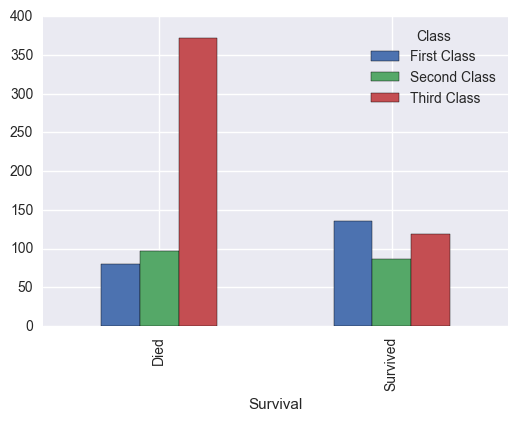

In [55]:
## I want to see the number of survivors from each class. Because there were different number of passengers from each class
## the proportion has to be calculated to obtain insight into the possible relationship between ses and survival.
## the countin class function is used again here to compare the number of survivors from each class and calculate the 
## survival proportion for each class.
titanic.groupby('Survival')['Class'].value_counts().unstack(level=-1).plot(kind='bar')

I am going to run a t test to identify whether the survival for the upper class passengers is statistically significant.

The null hypotheses is that the mean survival (survival proportion) is the same in upper class passengers as it is in lower class passengers. The alternative hypotheses is that the survival of upper class passengers is greater than those of lower class. The t test is going to be a positive one tail t-test. Also, it a two indenpendent sample with unequal sample sizes and variances t-test.

In [22]:
## T TEST comparing survival in upper class and in lower class
upper_class_data = titanic[titanic.Class=='First Class']['Survived']
lower_class_data = titanic[titanic.Class=='Third Class']['Survived']
upper_class_mean = upper_class_data.mean()
lower_class_mean = lower_class_data.mean()
upper_class_std = upper_class_data.std()
lower_class_std = lower_class_data.std()
upper_class_samplesize = float(len(upper_class_data))
lower_class_samplesize = float(len(lower_class_data))
degree_freedom = upper_class_samplesize + lower_class_samplesize -2
pool_variance = (((upper_class_data - upper_class_mean)**(2)).sum())/degree_freedom + \
                (((lower_class_data - lower_class_mean)**(2)).sum())/degree_freedom
standard_error = (pool_variance/upper_class_samplesize + pool_variance/lower_class_samplesize)**(float(1)/2)
t_value = (upper_class_mean - lower_class_mean)/standard_error
print 'Upper class descriptive stats:', upper_class_data.describe()
print 'Lower class descriptive stats:', lower_class_data.describe()
print 't value:', t_value
print 'degree of freedom:', degree_freedom
print 'Standard error:', standard_error

Upper class descriptive stats: count    216.000000
mean       0.629630
std        0.484026
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
Lower class descriptive stats: count    491.000000
mean       0.242363
std        0.428949
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64
t value: 10.623796624
degree of freedom: 705.0
Standard error: 0.0364527972324


The t critical value I obtained from an online t table. The link is: http://faculty.washington.edu/heagerty/Books/Biostatistics/TABLES/t-Tables/
Because there are 705 degrees of freedom and the table only has values for up to 500, I approximated the t value to the value for 500 degrees of freedom. The t critical value was found for an alpha level of 5%.

In [23]:
print 'alpha_level:', 0.05
print 't critical:', 1.65
print 'upper confidence interval:', upper_class_mean-lower_class_mean + 1.65*standard_error
print 'lower confidence interval:', upper_class_mean-lower_class_mean - 1.65*standard_error

alpha_level: 0.05
t critical: 1.65
upper confidence interval: 0.447414219605
lower confidence interval: 0.327119988738


Because the t value is larger than the t critical value the null can be rejected. This mean that it is statistically signficant that ther was a larger survival proportion for upper class passengers than that for lower class passengers.

([<matplotlib.axis.XTick at 0xd0f72b0>,
 <a list of 4 Text xticklabel objects>)

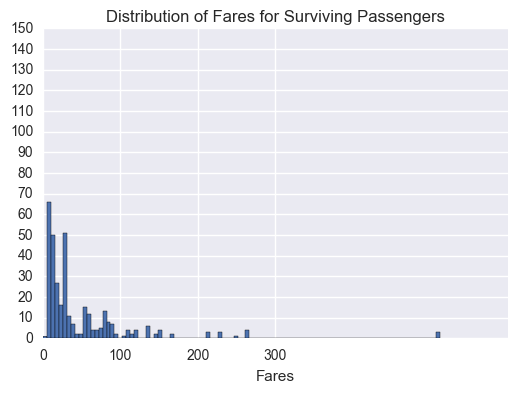

In [24]:
## I want to produce a histogram for the fares paid by surviving passengers and another one for the fares paid by dead passengers
## and then compare them. In order to produce an effective comparison, it is important that both graphs have the same axis values.
survival_fare = titanic[['Fare', 'Survived']]
survivors_fare = survival_fare[survival_fare['Survived']==1]
perished_fare = survival_fare[survival_fare['Survived']==0]
y_axis_values = [10*y for y in range(16)]
x_axis_values = [100*x for x in range(4)]
plt.hist(survivors_fare['Fare'], bins = 100)
plt.title('Distribution of Fares for Surviving Passengers')
plt.xlabel('Fares')
plt.yticks(y_axis_values)
plt.xticks(x_axis_values)

([<matplotlib.axis.XTick at 0xd038978>,
 <a list of 4 Text xticklabel objects>)

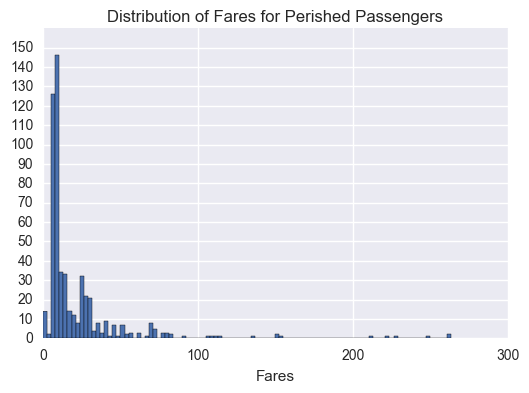

In [25]:
plt.hist(perished_fare['Fare'], bins=100)
plt.title('Distribution of Fares for Perished Passengers')
plt.xlabel('Fares')
plt.yticks(y_axis_values)
plt.xticks(x_axis_values)

Comparing the distribution of fares for perished and passengers who survived, it can be seen that a larger number of passengers, who paid fares below approximately 50, perished in comparison to those who survived having paid similar fares. This trend changes at fares above 50 (approximately), where the number of surviving passengers exceeds the number of perished passengers. I believe this could coincide with the fact that the survival proportions were larger for passengers from the upper class.

I want to see whether the increase in survival proportion for fares above 50 is mainly because those passengers were from upper class, or because they paid larger fares even whithin the upper class group

In [26]:
## I want to find the passengers from upper class who paid fares below 50 and above 0 to exclude crew members.
## Then I want to see the proportion of those passengers who survived.
fares_upper = titanic[['Fare','Pclass','Survived']][titanic['Pclass']==1]
fares_upper_survived = fares_upper[fares_upper >0][fares_upper<50].dropna()['Survived']
print 'Survival proportion for upper class passengers with fares less than 50:', fares_upper_survived.mean()*100, '%'

Survival proportion for upper class passengers with fares less than 50: 100.0 %


Since all the upper class passengers who paid fares below 50 survived, it can conluded that the increase in survival proportion viewed in the previous histograms was due to the passengers SES. Because those passengers paid larger fares, the survival proportion for bigger fares is higher than for lower ones. However,this is due to their SES primarily, and indirectedly to the fares paid. Otherwise, the survival proportion for the lowest paying upper class passengers would be less than for the highest paying upper class passengers which is not the case.

# 4- How was survival related to passengers with family?
<p> It was assumed that a family can be formed by a person with children, a person with a spouse, a person with a parent or a person with a sibling. A nanny with a children was considered as a special type of family.

In [27]:
passenger_family = titanic[['Name', 'Parch', 'SibSp','Survived','Age']]
#Lets checks if any family name is repeated in the data.
#In other words, I want to see if there are two or more people in the data belonging to the same family.
passenger_noparch=passenger_family.groupby('Parch').groups[0]
passenger_nosibsp = passenger_family.groupby('SibSp').groups[0]
individuals = passenger_family.loc[passenger_noparch].loc[passenger_nosibsp].dropna()
## Among individuals there is going to be children travelling with nannies. Those have to be appended to the passenger_yesfamily
## I will assume that children older than 14 would travel alone. 
children_nanny = individuals[individuals['Age']<=14]
passenger_nofamily = individuals[individuals['Age']>14]
passenger_yesfamily = passenger_family[passenger_family.Parch !=0].append(children_nanny)
print 'Surival proportion for family members:', passenger_yesfamily['Survived'].mean()
print 'Survival proportion for passengers travelling alone:', passenger_nofamily['Survived'].mean()
# have to append to passenger_yesfamily the ones that have sibsp but not parch

Surival proportion for family members: 0.511520737327
Survival proportion for passengers travelling alone: 0.32


In [28]:
## number of family members. use assign to create new column.
family_members = passenger_yesfamily.assign(numberofmembers = passenger_yesfamily['SibSp']+passenger_yesfamily['Parch']+1)
family_lastname = family_members.assign(lastname = family_members['Name'].str.split().str[0])
## I want to know whether there are two persons from different families but with the same family name.
## Some families have two worded lastnames
if len(family_lastname.groupby('Name')['numberofmembers'].max())-len(family_lastname.groupby('lastname').groups)<0:
    print 'There are repeated family names'
else:
    print 'There are no repeated family names'
    print 'Number of families aboard the titanic:', len(family_lastname.groupby('Name').groups)
    print 'Average number of family members:', family_members['numberofmembers'].mean()

There are no repeated family names
Number of families aboard the titanic: 217
Average number of family members: 3.97235023041


In [29]:
## let's examine survival depending on your title within a family (Mr, Miss, Master, Mrs)

In [30]:
## First I need to identify the different titles.
x = family_lastname.groupby(family_lastname['Name'].str.split().str[1])
print x.groups.keys()

['Miss.', 'Rev.', 'Mrs.', 'Capt.', 'Impe,', 'Mr.', 'Billiard,', 'Master.']


Some of the titles I dont recognize, so I am just going to print them out to examine them.

In [31]:
print family_lastname.loc[x.groups['Rev.']]
print family_lastname.loc[x.groups['Impe,']]
print family_lastname.loc[x.groups['Billiard,']]
print family_lastname.loc[x.groups['Capt.']]

                  Name  Parch  SibSp  Survived   Age  numberofmembers lastname
848  Harper, Rev. John    1.0    0.0       0.0  28.0              2.0  Harper,
                                                  Name  Parch  SibSp  \
419                          Van Impe, Miss. Catharina    2.0    0.0   
595                        Van Impe, Mr. Jean Baptiste    1.0    1.0   
799  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...    1.0    1.0   

     Survived   Age  numberofmembers lastname  
419       0.0  10.0              3.0      Van  
595       0.0  36.0              3.0      Van  
799       0.0  30.0              3.0      Van  
                                Name  Parch  SibSp  Survived   Age  \
153  van Billiard, Mr. Austin Blyler    2.0    0.0       0.0  40.5   

     numberofmembers lastname  
153              3.0      van  
                             Name  Parch  SibSp  Survived   Age  \
745  Crosby, Capt. Edward Gifford    1.0    1.0       0.0  70.0   

     numberofmembers 

Capt is really a Mr and so is Rev. Impe and Billiard are errors produced by the fact that their lastname is made up of two words. Have to fix this. This also influences the lastname column, meaning it is wrong for those rows. Luckily the number of families calculated before still stands correct because although both Van Impe and van Billiard, begin with van, one has capital V and the other lowercase.

In [32]:
## Correct title
family_title = family_lastname.assign(title=family_lastname['Name'].str.split().str[1])
family_title.set_value(family_title[family_title['title']=='Capt.'].index,'title','Mr.')
family_title.set_value(family_title[family_title['title']=='Rev.'].index,'title','Mr.')
index_billiard = family_title[family_title['title']=='Billiard,'].index
family_title.set_value(index_billiard,'title', family_title[family_title['title']=='Billiard,']['Name'].str.split().str[2])
index_impe = family_title[family_title['title']=='Impe,'].index
family_title.set_value(index_impe,'title', family_title[family_title['title']=='Impe,']['Name'].str.split().str[2])
## Correct lastname for van billiard and Van Impe
family_title.set_value(index_billiard, 'lastname', 'van Billiard')
family_title.set_value(index_impe, 'lastname', 'Van Impe')

,Name,Parch,SibSp,Survived,Age,numberofmembers,lastname,title
7,"Palsson, Master. Gosta Leonard",1.0,3.0,0.0,2.00,5.0,"Palsson,",Master.
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0,0.0,1.0,27.00,3.0,"Johnson,",Mrs.
10,"Sandstrom, Miss. Marguerite Rut",1.0,1.0,1.0,4.00,3.0,"Sandstrom,",Miss.
13,"Andersson, Mr. Anders Johan",5.0,1.0,0.0,39.00,7.0,"Andersson,",Mr.
16,"Rice, Master. Eugene",1.0,4.0,0.0,2.00,6.0,"Rice,",Master.
24,"Palsson, Miss. Torborg Danira",1.0,3.0,0.0,8.00,5.0,"Palsson,",Miss.
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",5.0,1.0,1.0,38.00,7.0,"Asplund,",Mrs.
27,"Fortune, Mr. Charles Alexander",2.0,3.0,0.0,19.00,6.0,"Fortune,",Mr.
43,"Laroche, Miss. Simonne Marie Anne Andree",2.0,1.0,1.0,3.00,4.0,"Laroche,",Miss.
50,"Panula, Master. Juha Niilo",1.0,4.0,0.0,7.00,6.0,"Panula,",Master.


In [33]:
Survival_proportion_by_title_among_families = family_title.groupby('title')['Survived'].mean()
print 'Survival proportion by title among families:', Survival_proportion_by_title_among_families

Survival proportion by title among families: title
Master.    0.564103
Miss.      0.626866
Mr.        0.127273
Mrs.       0.714286
Name: Survived, dtype: float64


The survival proportion was found to be larger for passengers with family members aboard than for passengers travelling alone. A correlation was not proven. It must be considered that this dataset only operates with 891 passengers, which is 30% of the number of titanic passengers. Hence, when comparing two survival proportions for two sets of passengers, in this case individuals and family members, it could be that the whole population presents different behaviour. 
Within a family, the survival was found highest among Mrs, Master and Miss. The reason for this might be because Master, Miss are mostly children and because Mrs were mothers and also because females in this sample had a larger survival proportion than males. However, further analysis and statistical tests would be needed to prove this.